In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movie-review/The Dark Knight 2008.csv
/kaggle/input/movie-review/Star Wars Episode VIII - The Last Jedi 2017.csv
/kaggle/input/movie-review/The Lord of the Rings The Fellowship of the Ring 2001.csv
/kaggle/input/movie-review/Joker 2019.csv
/kaggle/input/movie-review/Star Wars Episode VII - The Force Awakens 2015.csv


In [2]:
# Import all the tools we need


# Regular EDA(exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


%matplotlib inline

## Import data

In [3]:
df = pd.read_csv('/kaggle/input/movie-review/Joker 2019.csv')

In [4]:
df.shape

(10046, 7)

## Check for Null values

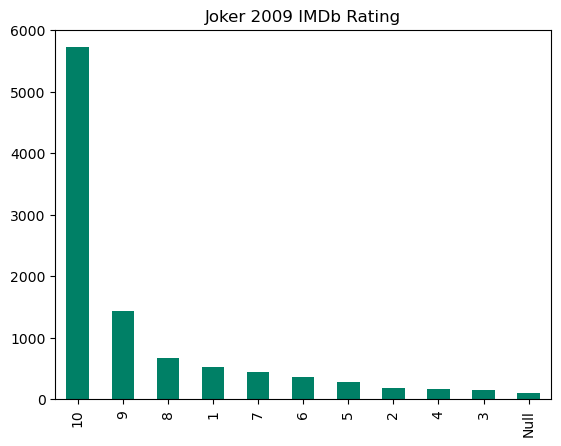

In [5]:
df.rating.value_counts().plot(kind='bar', cmap='summer', title='Joker 2009 IMDb Rating');

In [6]:
li = []
for rev in df.review:
    li.append(len(rev))
    if len(rev) == 2771:
        print(rev, end='\n ended\n')

In [7]:
li.sort()
li[:10]

[11, 11, 11, 14, 15, 15, 17, 19, 20, 23]

In [8]:
li.sort(reverse=True)
li[1000:1010]

[1490, 1489, 1486, 1485, 1483, 1482, 1482, 1480, 1477, 1476]

## Important functions

In [9]:
def setup_data(df):
    '''
    Preprocess some basic works
    '''
    # Drop every column except the specified column
    df = df[['rating', 'review']]
    # Drop Null rows
    df = df[~(df == 'Null').any(axis=1)]
    
    
    return df

def remove_big_review(rev):
    '''
    Removes big review greter than length
    '''
    if len(rev)>3000:
        rev = 'Null'
    return rev

def clean_text(test):
    '''
    Clean's up the unnecessary thiings of a text by replacing them with proper symbols.
    '''
    test = test.replace('<br/>', '')
    test = test.replace('--', ' ')
    test = test.replace("'", '')
    test = test.replace('"','')
    test = test.replace('.', '')
    test = test.replace(',', '')
    test = test.replace('?', '')
    test = test.replace('!', '')
    test = test.replace('\n', '')
    test = test.lower()
    return test

def stop_words(doc):
    '''
    Removes Words that are not that necessary for our model.
    '''
    # Process the document
    doc = nlp(doc)

    # List of stop words in spaCy
    stop_words = spacy.lang.en.stop_words.STOP_WORDS

    # Filter out stop words from the document
    filtered_words = [token.text for token in doc if not token.is_stop]

    # Join the filtered words back into a string
    filtered_document = " ".join(filtered_words)
    
    return filtered_document

import spacy

# Load the pre-trained spaCy model
nlp = spacy.load("en_core_web_lg")


# Function to convert text to vectors using spaCy
def text_to_vectors(text):
    '''
    Converts text to vector
    '''
    doc = nlp(text)
    return doc.vector


def level(x):
    '''
    Changes predicted levels to human brain level.
    '''
    if x in [10, 9]:
        x = 0
    elif x in [7, 8]:
        x = 1
    elif x in [5, 6]:
        x = 2
    elif x in [1, 2, 3, 4]:
        x = 3
    return x

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [10]:
df.review = df.review.apply(remove_big_review)
df = setup_data(df)
df.shape

(9655, 2)

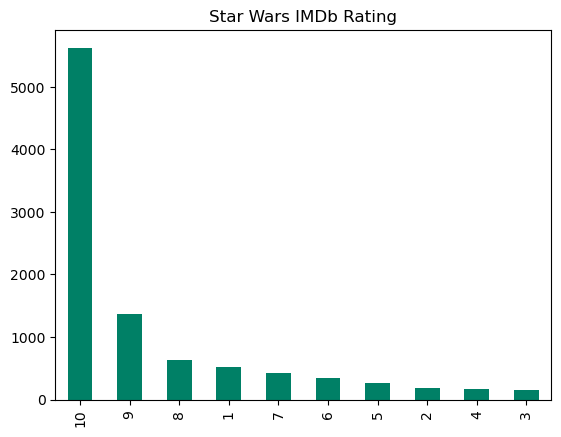

In [11]:
df.rating.value_counts().plot(kind='bar', cmap='summer', title='Star Wars IMDb Rating');

## Not using stop Words

In [12]:
# Clean the text removing unnecessary things
df['review'] = df['review'].apply(clean_text)

# Convert to vector
df['vector'] = df['review'].apply(text_to_vectors)

## Using Stop Words

In [13]:
# Clean the text removing unnecessary things
df['review'] = df['review'].apply(clean_text)
df['review'] = df['review'].apply(stop_words)

# Convert to vector
df['vector'] = df['review'].apply(text_to_vectors)


In [14]:
df.head(3)

,rating,review,vector
0,10,person saw hype claims masterpiece overreactin...,"[-0.31473646, 0.20912966, -0.86060315, -1.2628..."
1,10,movie comes truly makes impact joaquins perfor...,"[-0.036105927, 1.4407943, -1.3615227, 0.157856..."
2,10,movie felt isolated truly relate understand mo...,"[-0.91238123, 0.750262, -2.4282863, -2.7551541..."


In [15]:
df.rating = df.rating.astype(int)
df.rating = df.rating.apply(level)

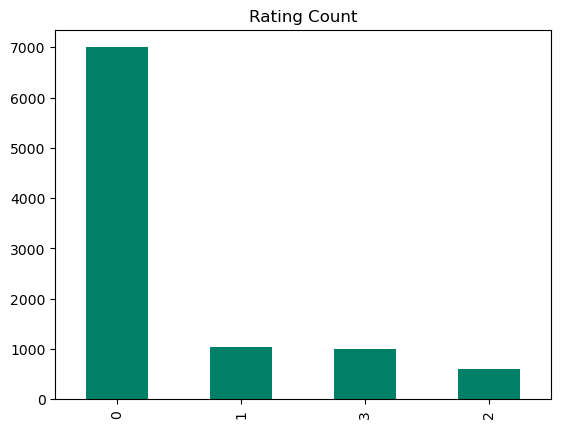

In [16]:
df.rating.value_counts().plot(kind='bar', cmap='summer', title='Rating Count');

In [17]:
level_df = pd.DataFrame({'level': [0, 1, 2, 3],
                         'range': [[10, 9], [8,7], [5,6], [1,2,3,4]]})
level_df

,level,range
0,0,"[10, 9]"
1,1,"[8, 7]"
2,2,"[5, 6]"
3,3,"[1, 2, 3, 4]"


In [18]:
df.head(3)

,rating,review,vector
0,0,person saw hype claims masterpiece overreactin...,"[-0.31473646, 0.20912966, -0.86060315, -1.2628..."
1,0,movie comes truly makes impact joaquins perfor...,"[-0.036105927, 1.4407943, -1.3615227, 0.157856..."
2,0,movie felt isolated truly relate understand mo...,"[-0.91238123, 0.750262, -2.4282863, -2.7551541..."


# Modeling

## Important functions

In [19]:
def value_count(y_pred):
    # Get unique values and their frequencies
    unique_values, value_counts = np.unique(y_pred, return_counts=True)

    # Print the unique values and their frequencies
    for value, count in zip(unique_values, value_counts):
        print(f'{value}: {count}')


## Seperate the feature and target variable

In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split

In [21]:
# Set data 
X = list(df['vector'])
y = list(df.rating.astype(int))
# Split the data into training and testing sets

np.random.seed(71)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
len(X_train), len(X_test), len(y_train), len(y_test)

(7724, 1931, 7724, 1931)

## `RandomForestClassifier`

In [22]:
# Load model
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred = rfc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy*100:.2f}%", )

Accuracy: 73.85%


In [23]:
value_count(y_pred), print(),value_count(y_test);

0: 1899
3: 32

0: 1404
1: 203
2: 133
3: 191


In [24]:
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [25]:
y_test[:10]

[0, 0, 3, 1, 1, 0, 0, 0, 0, 2]

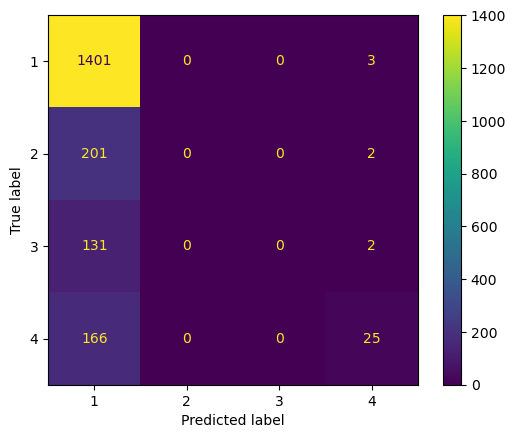

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Make our confusion matrixx more visual with Seaborn's heatmap()
import seaborn as sb

con_mat = confusion_matrix(y_test, y_pred)

con_mat_plot = metrics.ConfusionMatrixDisplay(confusion_matrix=con_mat, display_labels=[1,2,3,4])
con_mat_plot.plot()
plt.show()

## `SupportVectorMachine`

In [27]:
# Import SVC
from sklearn.svm import SVC

# Create and train the SVM classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Make predictions
y_preds = svm_model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_preds)

print(f"Accuracy: {accuracy*100:.2f}")

Accuracy: 76.23


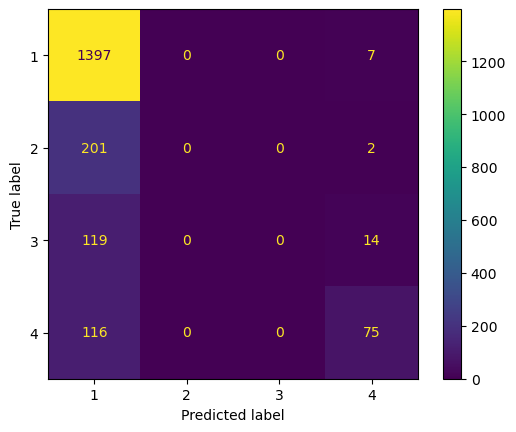

In [28]:
con_mat = confusion_matrix(y_test, y_preds)

con_mat_plot = metrics.ConfusionMatrixDisplay(confusion_matrix=con_mat, display_labels=[1,2,3,4])
con_mat_plot.plot()
plt.show()

## LogisticRegression

In [29]:
# Import logistic regression
from sklearn.linear_model import LogisticRegression


# Create and train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions
preds = logreg.predict(X_test)

#Calculate accuracy score
accuracy = accuracy_score(y_test, preds)

print(f"Accuracy: {accuracy*100:.2f}", )

Accuracy: 76.13


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


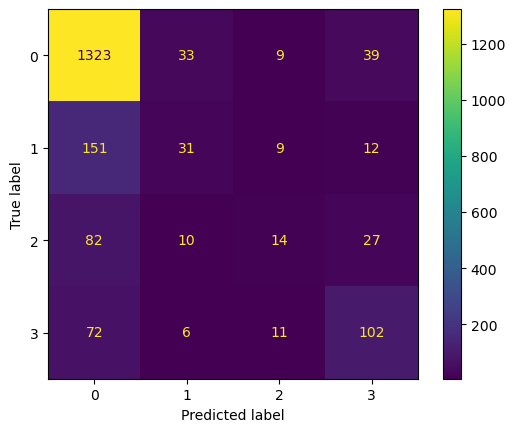

In [30]:
con_mat = confusion_matrix(y_test, preds)
con_mat
con_mat_plot = metrics.ConfusionMatrixDisplay(confusion_matrix=con_mat, display_labels=[0,1,2,3])
con_mat_plot.plot()
plt.show()

In [31]:
preds[:10]

array([0, 0, 3, 0, 0, 0, 0, 0, 0, 3])

In [32]:
y_test[:10]

[0, 0, 3, 1, 1, 0, 0, 0, 0, 2]

## `XgBoostClassifier`

In [33]:
# Create and fit the XGBoost classifier
model = XGBClassifier(num_class=4)
model.fit(X_train, y_train)

# Make predictions on the test set
y_prd = model.predict(X_test)
#Calculate accuracy score
accuracy = accuracy_score(y_test, y_prd)

print(f"Accuracy: {accuracy*100:.2f}", )

Accuracy: 75.61


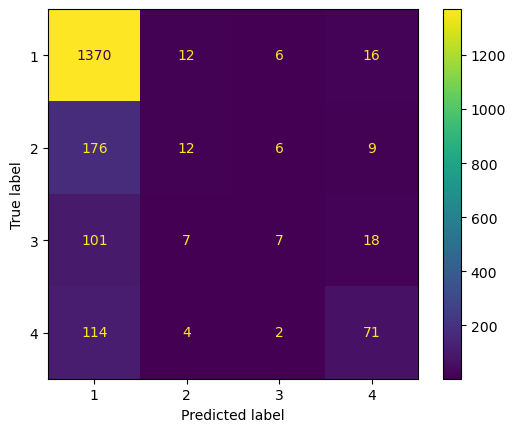

In [34]:
con_mat = confusion_matrix(y_test, y_prd)
con_mat
con_mat_plot = metrics.ConfusionMatrixDisplay(confusion_matrix=con_mat, display_labels=[1,2,3,4])
con_mat_plot.plot()
plt.show()

## Model Comparision

In [35]:
model_score = {
    'name': ['RFC', 'SVM', 'LogisticRegression', 'XBClassifier'],
    'score': [rfc.score(X_test, y_test), svm_model.score(X_test, y_test), logreg.score(X_test, y_test), model.score(X_test, y_test)]
}
# Convert the dictionary to a DataFrame
scores = pd.DataFrame(model_score)

# Print the DataFrame
scores

,name,score
0,RFC,0.738477
1,SVM,0.762299
2,LogisticRegression,0.761264
3,XBClassifier,0.756085


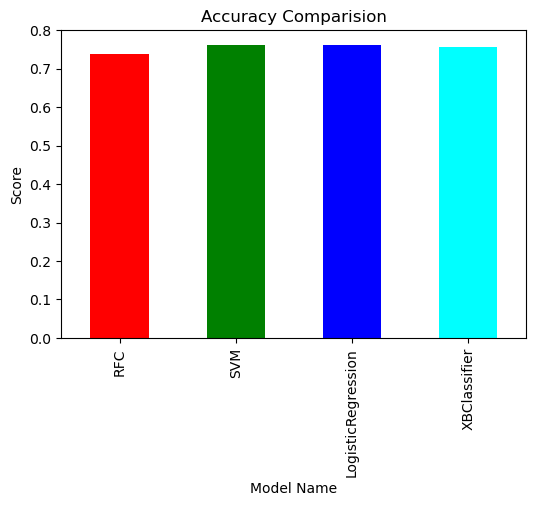

In [36]:
# Create a figure with a custom figsize

# Plot the DataFrame
scores.plot(x='name', y='score', kind='bar', color=['red', 'green', 'blue', 'cyan'], figsize=(6, 4), legend=False)
# plt.legend(False)
plt.xlabel('Model Name')
plt.ylabel('Score')
plt.title('Accuracy Comparision')

# Display the plot
plt.show();

In [37]:
from sklearn.model_selection import cross_val_score

def max_cv_score(model):
    '''
    Max Cross Val score of model
    '''
    ans = cross_val_score(model, X, y, cv=5)
    print(f'Highest accuracy: {max(ans)*100:.0f}%.');

In [38]:
max_cv_score(logreg)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Highest accuracy: 76%.


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
